## Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading individual datasets:

## NIFTY50: 
The Nifty 50 is the benchmark stock market index for the Indian equity market. In simple terms, it's a single number that represents the performance of 50 of the largest, most liquid, and financially sound companies listed on the National Stock Exchange of India (NSE).

In [2]:
# Load Nifty 50 Data
nifty_df = pd.read_csv("G:/5th trimester/Econometrics-code/Labs/LAB-2/NIFTY50.csv")
nifty_df.columns = nifty_df.columns.str.strip()
nifty_df = nifty_df[['Date', 'Close']] # Keep only Date and Close columns
nifty_df.rename(columns={'Close': 'NIFTY50_CLOSE'}, inplace=True)
nifty_df['Date'] = pd.to_datetime(nifty_df['Date'], format='%d-%b-%Y')
nifty_df.set_index('Date', inplace=True)
print("Loaded NIFTY50.csv successfully.")
print(nifty_df.head())

Loaded NIFTY50.csv successfully.
            NIFTY50_CLOSE
Date                     
2024-04-01       22462.00
2024-04-02       22453.30
2024-04-03       22434.65
2024-04-04       22514.65
2024-04-05       22513.70


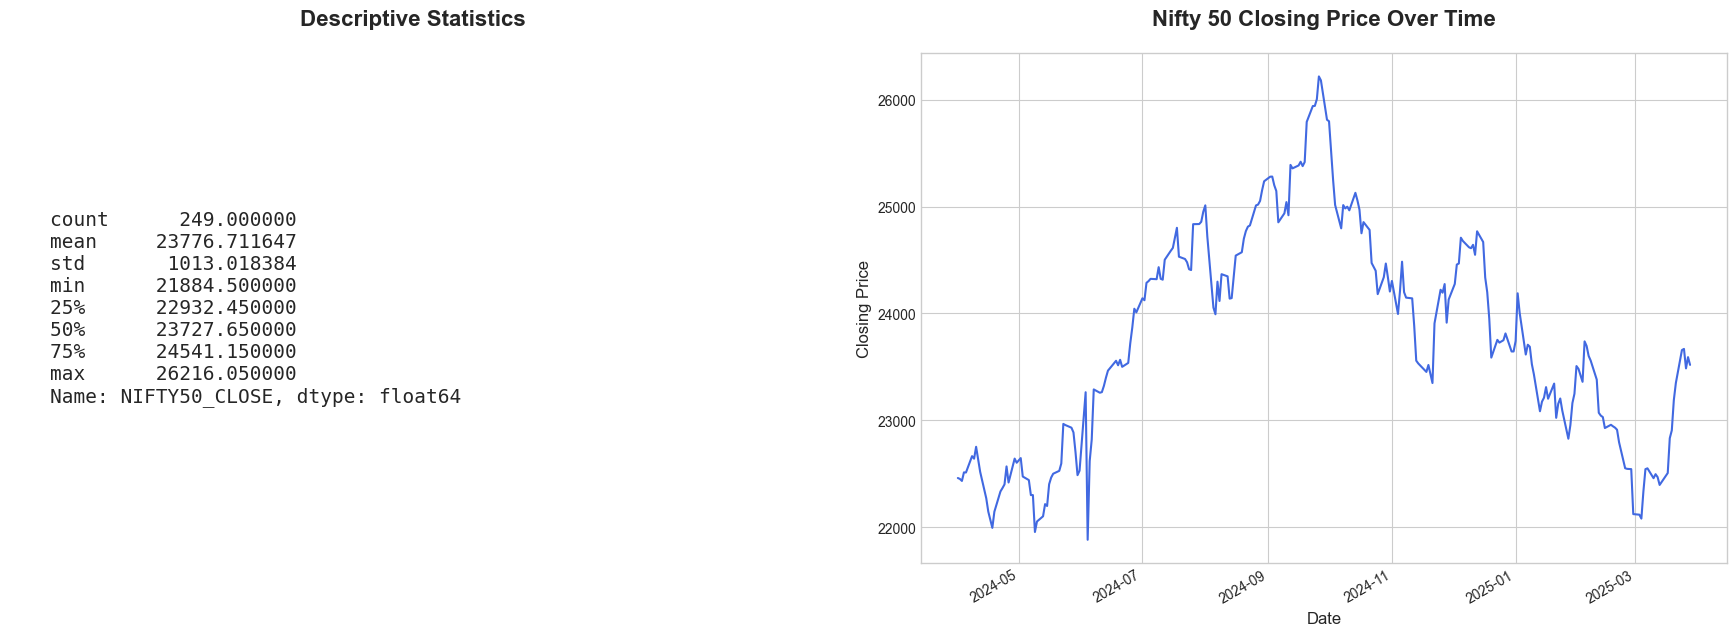

In [3]:
description = nifty_df['NIFTY50_CLOSE'].describe()

# Creatimg the side-by-side plot
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Displaying the descriptive statistics
ax1.axis('off') # Hide the axes
ax1.text(
    x=0.05,
    y=0.5,
    s=str(description),
    fontsize=14,
    fontfamily='monospace', # Monospace font for better alignment
    verticalalignment='center'
)
ax1.set_title('Descriptive Statistics', fontsize=16, pad=20, weight='bold')

# Plotting the closing price
sns.lineplot(data=nifty_df, x=nifty_df.index, y='NIFTY50_CLOSE', ax=ax2, color='royalblue')
ax2.set_title('Nifty 50 Closing Price Over Time', fontsize=16, pad=20, weight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Closing Price', fontsize=12)
fig.autofmt_xdate() # Automatically format the x-axis dates
plt.tight_layout(pad=3.0)
plt.show()

## INFOSYS:
Infosys one of India's largest and most prominent multinational information technology (IT) companies. It provides business consulting, IT, and outsourcing services to clients across the globe, with a significant presence in North America and Europe.

In [4]:
# Load Infosys Data
infosys_df = pd.read_csv("G:/5th trimester/Econometrics-code/Labs/LAB-2/Infosys.csv")
infosys_df.columns = infosys_df.columns.str.strip()
infosys_df = infosys_df[['Date', 'close']] # Keep only Date and Close columns
infosys_df.rename(columns={'close': 'INFOSYS_CLOSE'}, inplace=True) 
infosys_df['INFOSYS_CLOSE'] = infosys_df['INFOSYS_CLOSE'].astype(str).str.replace(',', '')
infosys_df['INFOSYS_CLOSE'] = pd.to_numeric(infosys_df['INFOSYS_CLOSE'], errors='coerce')
infosys_df['Date'] = pd.to_datetime(infosys_df['Date'], dayfirst=True)
infosys_df.set_index('Date', inplace=True)
print("Loaded Infosys.csv successfully.")
print(infosys_df.head())

Loaded Infosys.csv successfully.
            INFOSYS_CLOSE
Date                     
2025-03-28        1570.65
2025-03-27        1603.55
2025-03-26        1599.45
2025-03-25        1628.45
2025-03-24        1592.75


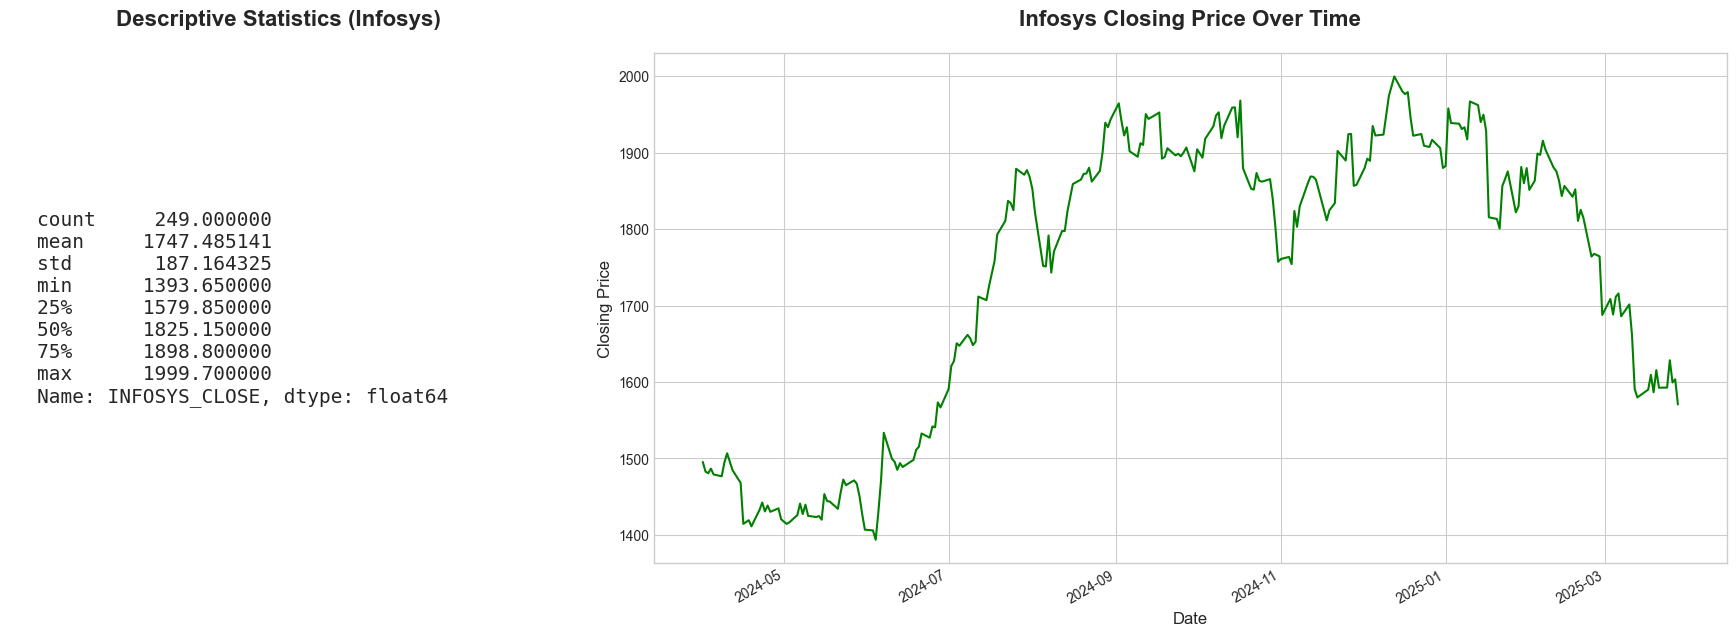

In [5]:
# Descriptive statistics 
description = infosys_df['INFOSYS_CLOSE'].describe()

# Create the side-by-side plot
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), gridspec_kw={'width_ratios': [1, 2]})

# Displaying the descriptive statistics
ax1.axis('off') # Hide the plot axes
ax1.text(
    x=0.05,
    y=0.5,
    s=str(description),
    fontsize=14,
    fontfamily='monospace',
    verticalalignment='center'
)
ax1.set_title('Descriptive Statistics (Infosys)', fontsize=16, pad=20, weight='bold')

# Plotting the closing price 
sns.lineplot(data=infosys_df, x=infosys_df.index, y='INFOSYS_CLOSE', ax=ax2, color='green')
ax2.set_title('Infosys Closing Price Over Time', fontsize=16, pad=20, weight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Closing Price', fontsize=12)
fig.autofmt_xdate() # Automatically format the x-axis dates for readability

# Display the final plot
plt.tight_layout(pad=3.0)
plt.show()

## Crude oil data:
Crude oil price refers to the market value for one barrel of unrefined petroleum. It is arguably the most critical commodity price in the world, directly impacting the global economy. Prices are typically quoted against benchmarks like Brent Crude (the international standard) and West Texas Intermediate (WTI) (the North American standard).

In [6]:
# Load Crude Oil Data
oil_df = pd.read_csv("G:/5th trimester/Econometrics-code/Labs/LAB-2/OIL.csv")
oil_df.columns = oil_df.columns.str.strip()
oil_df = oil_df[['Date', 'Price']] # Keep only Date and Price columns
oil_df.rename(columns={'Price': 'OIL_PRICE'}, inplace=True)
oil_df['Date'] = pd.to_datetime(oil_df['Date'], dayfirst=True)
oil_df.set_index('Date', inplace=True)
print("Loaded OIL.csv successfully.")
print(oil_df.head())

Loaded OIL.csv successfully.
            OIL_PRICE
Date                 
2025-03-31      71.48
2025-03-28      69.36
2025-03-27      69.92
2025-03-26      69.65
2025-03-25      69.00


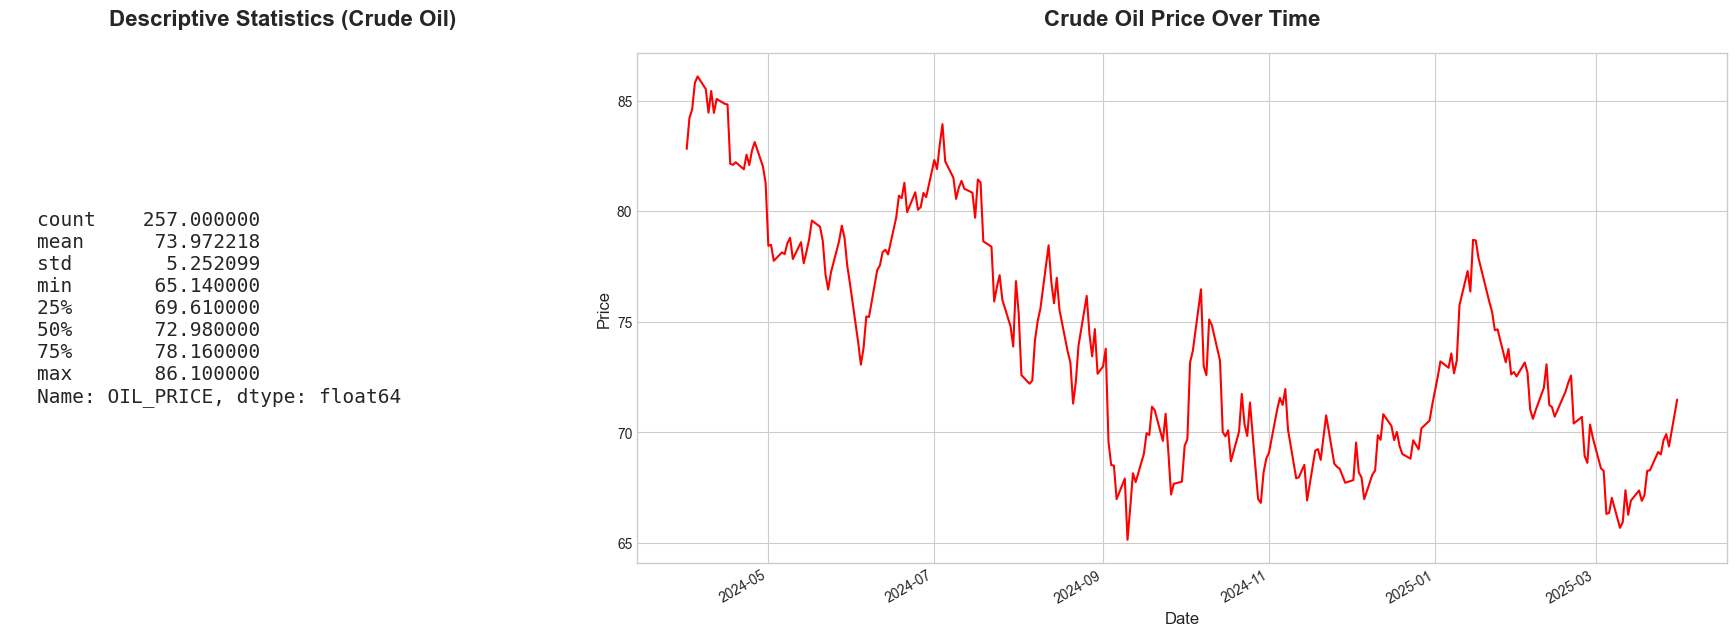

In [7]:
# Descriptive statistics
description = oil_df['OIL_PRICE'].describe()

# Creating the side-by-side plot
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), gridspec_kw={'width_ratios': [1, 2]})

# Displaying the descriptive statistics
ax1.axis('off')
ax1.text(
    x=0.05, y=0.5, s=str(description),
    fontsize=14, fontfamily='monospace', verticalalignment='center'
)
ax1.set_title('Descriptive Statistics (Crude Oil)', fontsize=16, pad=20, weight='bold')

# Plotting the price
sns.lineplot(data=oil_df, x=oil_df.index, y='OIL_PRICE', ax=ax2, color='red')
ax2.set_title('Crude Oil Price Over Time', fontsize=16, pad=20, weight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Price', fontsize=12)
fig.autofmt_xdate()
plt.tight_layout(pad=3.0)
plt.show()

## USD/INR:
The USD/INR exchange rate represents how many Indian Rupees (INR) are needed to purchase one US Dollar (USD). It is a critical financial indicator that reflects the relative strength of the two currencies and the broader health of the Indian economy.

In [8]:
# Load USD/INR Data
usdinr_df = pd.read_csv("G:/5th trimester/Econometrics-code/Labs/LAB-2/USD_INR.csv")
usdinr_df = usdinr_df[['Date', 'USD']] # Keep only Date and USD columns
usdinr_df.rename(columns={'USD': 'USD_INR_RATE'}, inplace=True)
usdinr_df['Date'] = pd.to_datetime(usdinr_df['Date'], dayfirst=True)
usdinr_df.set_index('Date', inplace=True)
print("Loaded USD_INR.csv successfully.")
print(usdinr_df.head())

Loaded USD_INR.csv successfully.
            USD_INR_RATE
Date                    
2025-03-28       85.5814
2025-03-27       85.7610
2025-03-26       85.8683
2025-03-25       85.7302
2025-03-24       85.8318


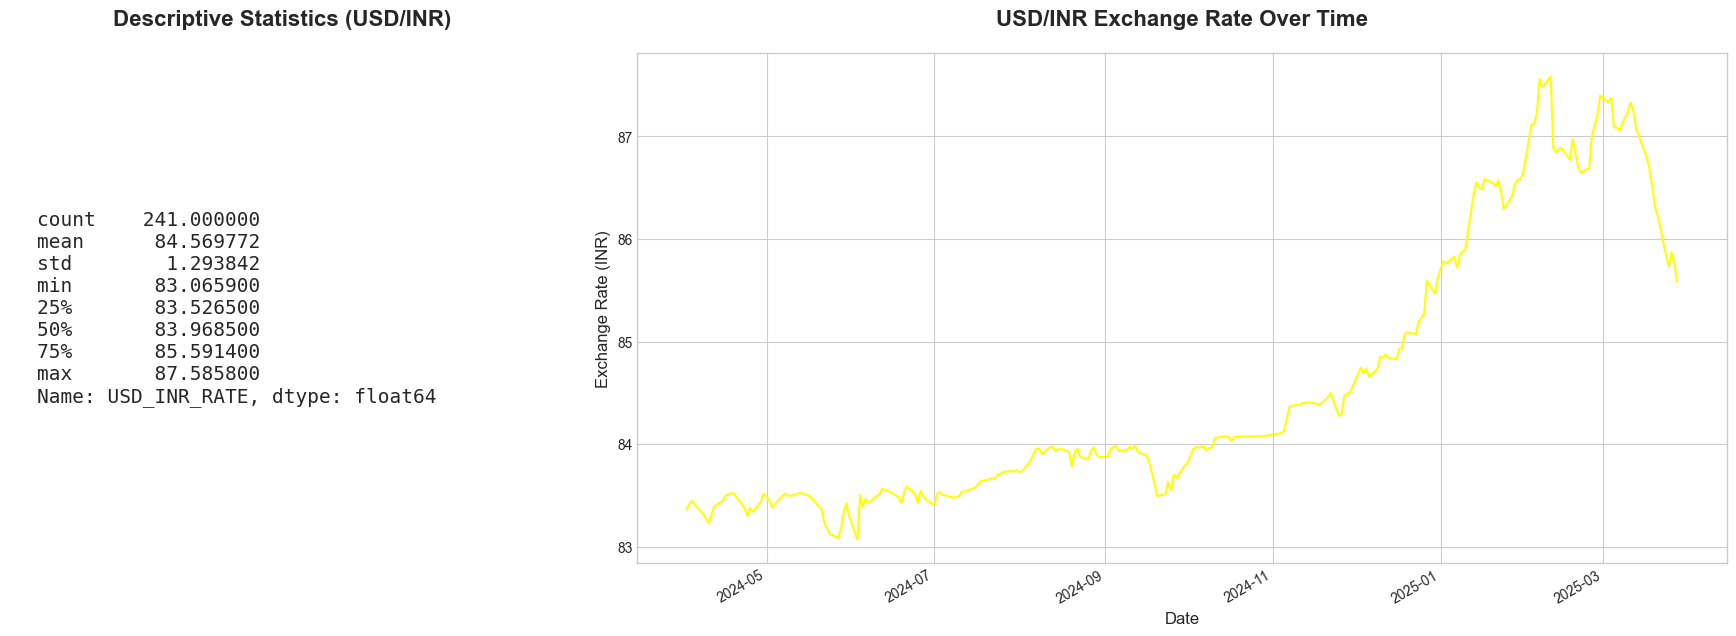

In [9]:
# Descriptive statistics for the USD/INR Rate
description = usdinr_df['USD_INR_RATE'].describe()

# Creating the side-by-side plot
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7), gridspec_kw={'width_ratios': [1, 2]})

# Displaying the descriptive statistics 
ax1.axis('off')
ax1.text(
    x=0.05, y=0.5, s=str(description),
    fontsize=14, fontfamily='monospace', verticalalignment='center'
)
ax1.set_title('Descriptive Statistics (USD/INR)', fontsize=16, pad=20, weight='bold')

# Plotting the exchange rate
sns.lineplot(data=usdinr_df, x=usdinr_df.index, y='USD_INR_RATE', ax=ax2, color='yellow')
ax2.set_title('USD/INR Exchange Rate Over Time', fontsize=16, pad=20, weight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Exchange Rate (INR)', fontsize=12)
fig.autofmt_xdate()
plt.tight_layout(pad=3.0)
plt.show()

## Displaying from which date to which date the data is there:

In [10]:
print(f"Nifty 50 data runs from: {nifty_df.index.min().date()} to {nifty_df.index.max().date()}")
print(f"Infosys data runs from:  {infosys_df.index.min().date()} to {infosys_df.index.max().date()}")
print(f"Crude Oil data runs from: {oil_df.index.min().date()} to {oil_df.index.max().date()}")
print(f"USD/INR data runs from:   {usdinr_df.index.min().date()} to {usdinr_df.index.max().date()}")

Nifty 50 data runs from: 2024-04-01 to 2025-03-28
Infosys data runs from:  2024-04-01 to 2025-03-28
Crude Oil data runs from: 2024-04-01 to 2025-03-31
USD/INR data runs from:   2024-04-02 to 2025-03-28


## Combining the datasets:

In [11]:
# Combining all dataframes using an outer join to keep all dates
df = pd.concat([nifty_df, infosys_df, oil_df, usdinr_df], axis=1, join='outer')

# Sorting the dataset by date
df.sort_index(inplace=True)
print("\nFirst 5 rows of combined data (showing potential N/A values):")
print(df.head())

# Cleaning Data by Dropping N/A Values to get the aligned dataset
df.dropna(inplace=True)
print("\nFirst 5 rows of cleaned and aligned data:")
print(df.head())


First 5 rows of combined data (showing potential N/A values):
            NIFTY50_CLOSE  INFOSYS_CLOSE  OIL_PRICE  USD_INR_RATE
Date                                                             
2024-04-01       22462.00        1495.45      82.82           NaN
2024-04-02       22453.30        1482.85      84.22       83.3585
2024-04-03       22434.65        1480.65      84.61       83.4204
2024-04-04       22514.65        1486.70      85.81       83.4475
2024-04-05       22513.70        1479.10      86.10       83.4073

First 5 rows of cleaned and aligned data:
            NIFTY50_CLOSE  INFOSYS_CLOSE  OIL_PRICE  USD_INR_RATE
Date                                                             
2024-04-02       22453.30        1482.85      84.22       83.3585
2024-04-03       22434.65        1480.65      84.61       83.4204
2024-04-04       22514.65        1486.70      85.81       83.4475
2024-04-05       22513.70        1479.10      86.10       83.4073
2024-04-08       22666.30        147

## Computation of logarithmic returns:

In [12]:
price_cols = ['NIFTY50_CLOSE', 'INFOSYS_CLOSE', 'OIL_PRICE', 'USD_INR_RATE']
for col in price_cols:
    df[col] = df[col].astype(str).str.replace(',', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)

return_cols = []
for col in price_cols:
    return_col_name = f'R_{col}'
    df[return_col_name] = np.log(df[col] / df[col].shift(1))
    return_cols.append(return_col_name)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print("\nFirst 5 rows of the final dataset with calculated returns:")
print(df.head())


First 5 rows of the final dataset with calculated returns:
            NIFTY50_CLOSE  INFOSYS_CLOSE  OIL_PRICE  USD_INR_RATE  R_NIFTY50_CLOSE  R_INFOSYS_CLOSE  R_OIL_PRICE  R_USD_INR_RATE
Date                                                                                                                            
2024-04-02       22453.30        1482.85      84.22       83.3585              NaN              NaN          NaN             NaN
2024-04-03       22434.65        1480.65      84.61       83.4204        -0.000831        -0.001485     0.004620        0.000742
2024-04-04       22514.65        1486.70      85.81       83.4475         0.003560         0.004078     0.014083        0.000325
2024-04-05       22513.70        1479.10      86.10       83.4073        -0.000042        -0.005125     0.003374       -0.000482
2024-04-08       22666.30        1476.70      85.53       83.3176         0.006755        -0.001624    -0.006642       -0.001076


In [13]:
df.to_pickle('analysis_ready_df.pkl')
print("DataFrame saved successfully as 'analysis_ready_df.pkl'")

DataFrame saved successfully as 'analysis_ready_df.pkl'


In [14]:
df = pd.read_pickle('analysis_ready_df.pkl')

## Defining columns for each groups:

In [15]:
price_cols = ['NIFTY50_CLOSE', 'INFOSYS_CLOSE', 'OIL_PRICE', 'USD_INR_RATE']
return_cols = ['R_NIFTY50_CLOSE', 'R_INFOSYS_CLOSE', 'R_OIL_PRICE', 'R_USD_INR_RATE']

# Create the two separate DataFrames
prices_df = df[price_cols]
returns_df = df[return_cols]

print("\nPrice DataFrame")
print(prices_df.head())

print("\nReturns DataFrame")
print(returns_df.head())


Price DataFrame
            NIFTY50_CLOSE  INFOSYS_CLOSE  OIL_PRICE  USD_INR_RATE
Date                                                             
2024-04-02       22453.30        1482.85      84.22       83.3585
2024-04-03       22434.65        1480.65      84.61       83.4204
2024-04-04       22514.65        1486.70      85.81       83.4475
2024-04-05       22513.70        1479.10      86.10       83.4073
2024-04-08       22666.30        1476.70      85.53       83.3176

Returns DataFrame
            R_NIFTY50_CLOSE  R_INFOSYS_CLOSE  R_OIL_PRICE  R_USD_INR_RATE
Date                                                                     
2024-04-02              NaN              NaN          NaN             NaN
2024-04-03        -0.000831        -0.001485     0.004620        0.000742
2024-04-04         0.003560         0.004078     0.014083        0.000325
2024-04-05        -0.000042        -0.005125     0.003374       -0.000482
2024-04-08         0.006755        -0.001624    -0.006642 

## 1. Descriptive Analysis:

### (a) For prices:

In [16]:
print("\nDescriptive Statistics for Prices:")
print(prices_df.describe())


Descriptive Statistics for Prices:
       NIFTY50_CLOSE  INFOSYS_CLOSE   OIL_PRICE  USD_INR_RATE
count     237.000000     237.000000  237.000000    237.000000
mean    23796.491772    1748.977004   73.873713     84.547655
std      1018.053741     187.674531    5.173782      1.288119
min     21884.500000    1393.650000   65.140000     83.065900
25%     22932.450000    1586.550000   69.610000     83.523400
50%     23750.200000    1829.750000   72.980000     83.967100
75%     24572.650000    1901.850000   78.060000     85.465500
max     26216.050000    1999.700000   86.100000     87.585800


### (b) For returns:

In [17]:
print("\nDescriptive Statistics for Returns:")
print(returns_df.describe())


Descriptive Statistics for Returns:
       R_NIFTY50_CLOSE  R_INFOSYS_CLOSE  R_OIL_PRICE  R_USD_INR_RATE
count       236.000000       236.000000   236.000000      236.000000
mean          0.000197         0.000244    -0.000823        0.000112
std           0.009026         0.015144     0.017653        0.001394
min          -0.061124        -0.060383    -0.063203       -0.008021
25%          -0.003822        -0.007298    -0.011104       -0.000441
50%           0.000048         0.000154    -0.000279        0.000081
75%           0.004211         0.008622     0.009992        0.000717
max           0.033071         0.040826     0.053043        0.006281


## 2. Visual inspection:

### (a) For prices:

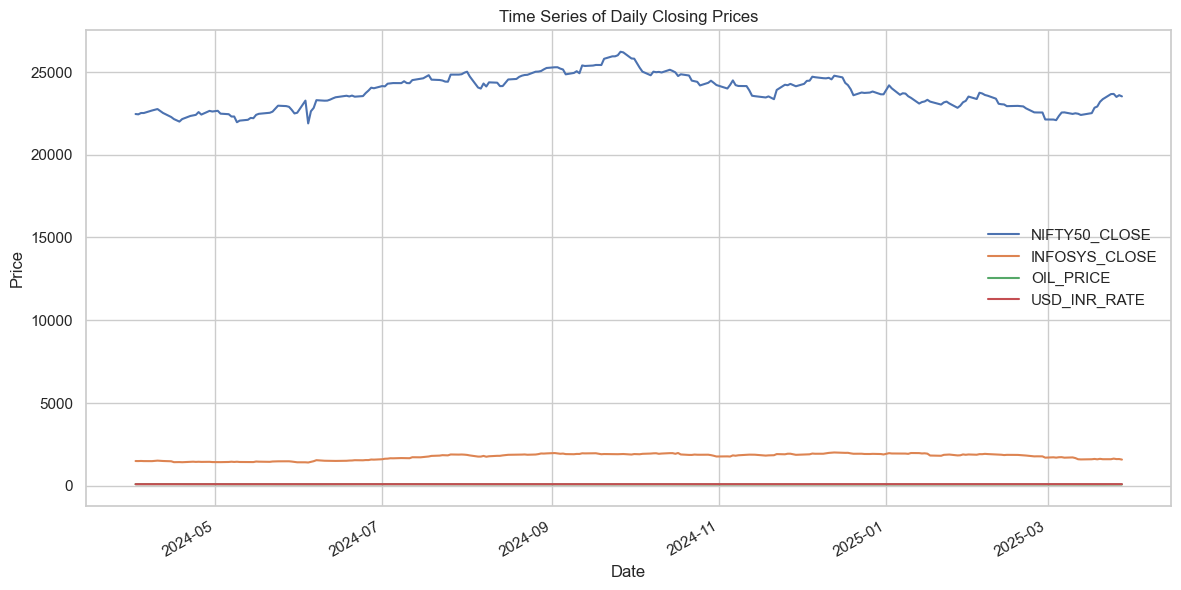

Price series plot saved as 'price_series_plot.png'.


In [18]:
sns.set(style="whitegrid")
prices_df.plot(figsize=(14, 7), title='Time Series of Daily Closing Prices', legend=True)
plt.ylabel('Price')
plt.savefig('price_series_plot.png')
plt.show()
print("Price series plot saved as 'price_series_plot.png'.")

### (b) For returns

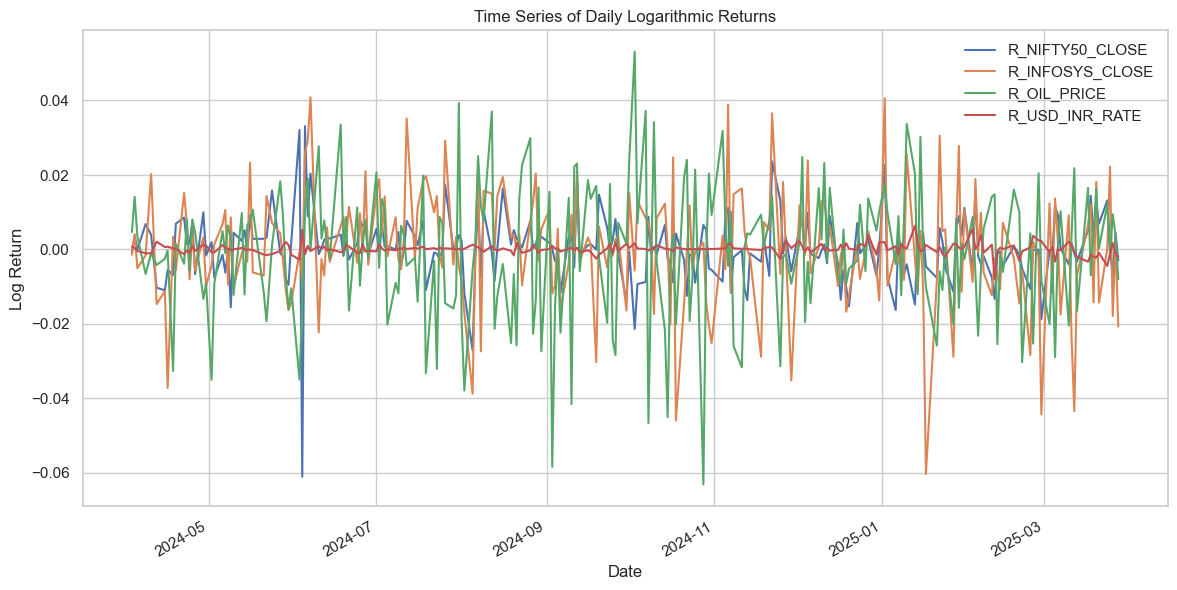

Return series plot saved as 'return_series_plot.png'.


In [19]:
returns_df.plot(figsize=(14, 7), title='Time Series of Daily Logarithmic Returns', legend=True)
plt.ylabel('Log Return')
plt.savefig('return_series_plot.png')
plt.show()
print("Return series plot saved as 'return_series_plot.png'.")

## 3. Stationary test:

In [20]:
def run_adf_test(series, name):
    result = adfuller(series)
    print(f'\nADF Test for: {name}')
    print('Null Hypothesis (H0): The series has a unit root (is non-stationary).')
    print(f'p-value: {result[1]:.4f}')
    if result[1] <= 0.05:
        print("Conclusion: Reject H0. The series is stationary.")
    else:
        print("Conclusion: Fail to reject H0. The series is non-stationary.")

### (a) For prices:

In [21]:
print("\nADF Tests for Price Series")
for col in prices_df.columns:
    run_adf_test(prices_df[col], f'Price Series - {col}')


ADF Tests for Price Series

ADF Test for: Price Series - NIFTY50_CLOSE
Null Hypothesis (H0): The series has a unit root (is non-stationary).
p-value: 0.3494
Conclusion: Fail to reject H0. The series is non-stationary.

ADF Test for: Price Series - INFOSYS_CLOSE
Null Hypothesis (H0): The series has a unit root (is non-stationary).
p-value: 0.6064
Conclusion: Fail to reject H0. The series is non-stationary.

ADF Test for: Price Series - OIL_PRICE
Null Hypothesis (H0): The series has a unit root (is non-stationary).
p-value: 0.1703
Conclusion: Fail to reject H0. The series is non-stationary.

ADF Test for: Price Series - USD_INR_RATE
Null Hypothesis (H0): The series has a unit root (is non-stationary).
p-value: 0.8240
Conclusion: Fail to reject H0. The series is non-stationary.


### (b) For returns:

In [22]:
print("\n--- ADF Tests for Return Series ---")
for col in returns_df.columns:
    series_to_test = returns_df[col].dropna()
    run_adf_test(series_to_test, f'Return Series - {col}')


--- ADF Tests for Return Series ---

ADF Test for: Return Series - R_NIFTY50_CLOSE
Null Hypothesis (H0): The series has a unit root (is non-stationary).
p-value: 0.0000
Conclusion: Reject H0. The series is stationary.

ADF Test for: Return Series - R_INFOSYS_CLOSE
Null Hypothesis (H0): The series has a unit root (is non-stationary).
p-value: 0.0000
Conclusion: Reject H0. The series is stationary.

ADF Test for: Return Series - R_OIL_PRICE
Null Hypothesis (H0): The series has a unit root (is non-stationary).
p-value: 0.0000
Conclusion: Reject H0. The series is stationary.

ADF Test for: Return Series - R_USD_INR_RATE
Null Hypothesis (H0): The series has a unit root (is non-stationary).
p-value: 0.0000
Conclusion: Reject H0. The series is stationary.


## Correlation:

### (a) For prices:

Price Correlation Matrix:
               NIFTY50_CLOSE  INFOSYS_CLOSE  OIL_PRICE  USD_INR_RATE
NIFTY50_CLOSE       1.000000       0.697952  -0.337123     -0.284122
INFOSYS_CLOSE       0.697952       1.000000  -0.615696      0.344915
OIL_PRICE          -0.337123      -0.615696   1.000000     -0.492325
USD_INR_RATE       -0.284122       0.344915  -0.492325      1.000000


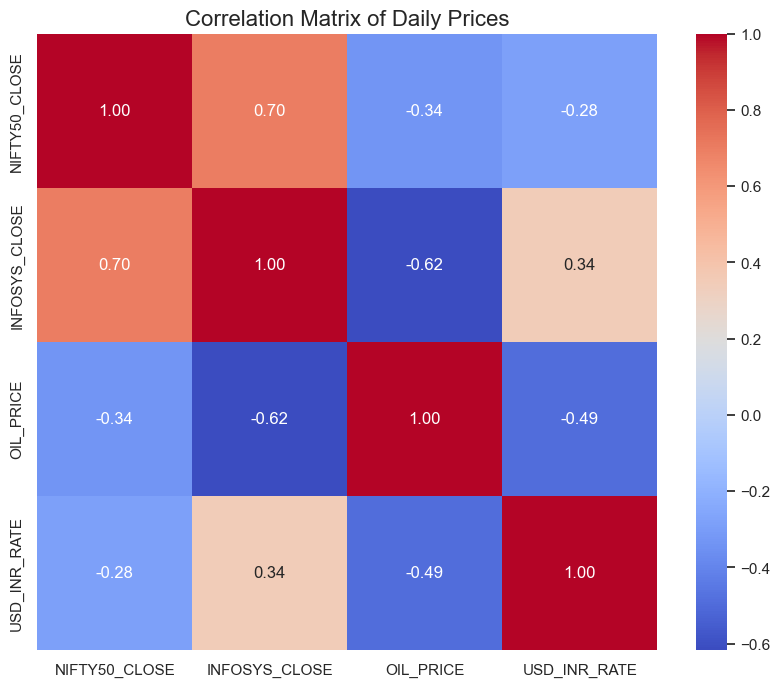


Price correlation heatmap saved as 'price_correlation_heatmap.png'.


In [23]:
price_correlation_matrix = prices_df.corr()

# Print the matrix
print("Price Correlation Matrix:")
print(price_correlation_matrix)

# Create a heatmap to visualize the matrix
plt.figure(figsize=(10, 8))
sns.heatmap(price_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Daily Prices', fontsize=16)
plt.savefig('price_correlation_heatmap.png')
plt.show()

print("\nPrice correlation heatmap saved as 'price_correlation_heatmap.png'.")

### (b) For returns:

Return Correlation Matrix:
                 R_NIFTY50_CLOSE  R_INFOSYS_CLOSE  R_OIL_PRICE  R_USD_INR_RATE
R_NIFTY50_CLOSE         1.000000         0.449704    -0.012992       -0.304505
R_INFOSYS_CLOSE         0.449704         1.000000     0.028234       -0.049281
R_OIL_PRICE            -0.012992         0.028234     1.000000        0.026856
R_USD_INR_RATE         -0.304505        -0.049281     0.026856        1.000000


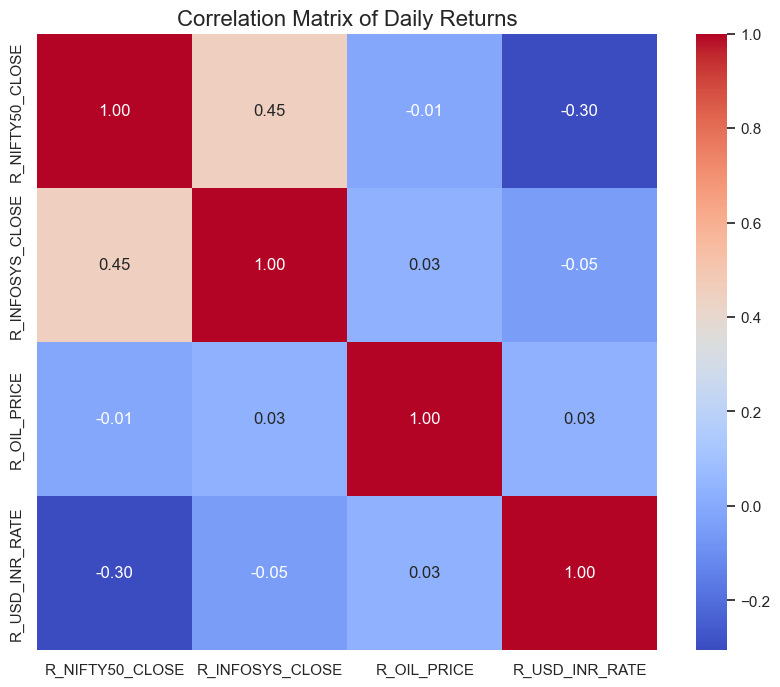


Return correlation heatmap saved as 'return_correlation_heatmap.png'.


In [24]:
return_correlation_matrix = returns_df.corr()

# Print the matrix
print("Return Correlation Matrix:")
print(return_correlation_matrix)

# Create a heatmap to visualize the matrix
plt.figure(figsize=(10, 8))
sns.heatmap(return_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Daily Returns', fontsize=16)
plt.savefig('return_correlation_heatmap.png')
plt.show()

print("\nReturn correlation heatmap saved as 'return_correlation_heatmap.png'.")

## Regression:

In [25]:
regression_df = returns_df.copy()
regression_df.dropna(inplace=True)

# Rename columns for easier use in the model
regression_df.rename(columns={
    'R_NIFTY50_CLOSE': 'R_NIFTY',
    'R_INFOSYS_CLOSE': 'R_INFOSYS',
    'R_OIL_PRICE': 'R_OIL',
    'R_USD_INR_RATE': 'R_USDINR'
}, inplace=True)

# Define the dependent variable (y) and independent variables (X)
y = regression_df['R_NIFTY']
X = regression_df[['R_INFOSYS', 'R_OIL', 'R_USDINR']]

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Estimating the OLS Mode and fitting the OLS model
model = sm.OLS(y, X).fit()

# Print the detailed regression summary
print("\nOLS Regression Results")
print(model.summary())

# Report Diagnostic Tests (VIF)
print("\nDiagnostic Test: Variance Inflation Factor (VIF)")

vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


OLS Regression Results
                            OLS Regression Results                            
Dep. Variable:                R_NIFTY   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     30.44
Date:                Sun, 05 Oct 2025   Prob (F-statistic):           1.24e-16
Time:                        11:09:22   Log-Likelihood:                 815.80
No. Observations:                 236   AIC:                            -1624.
Df Residuals:                     232   BIC:                            -1610.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0

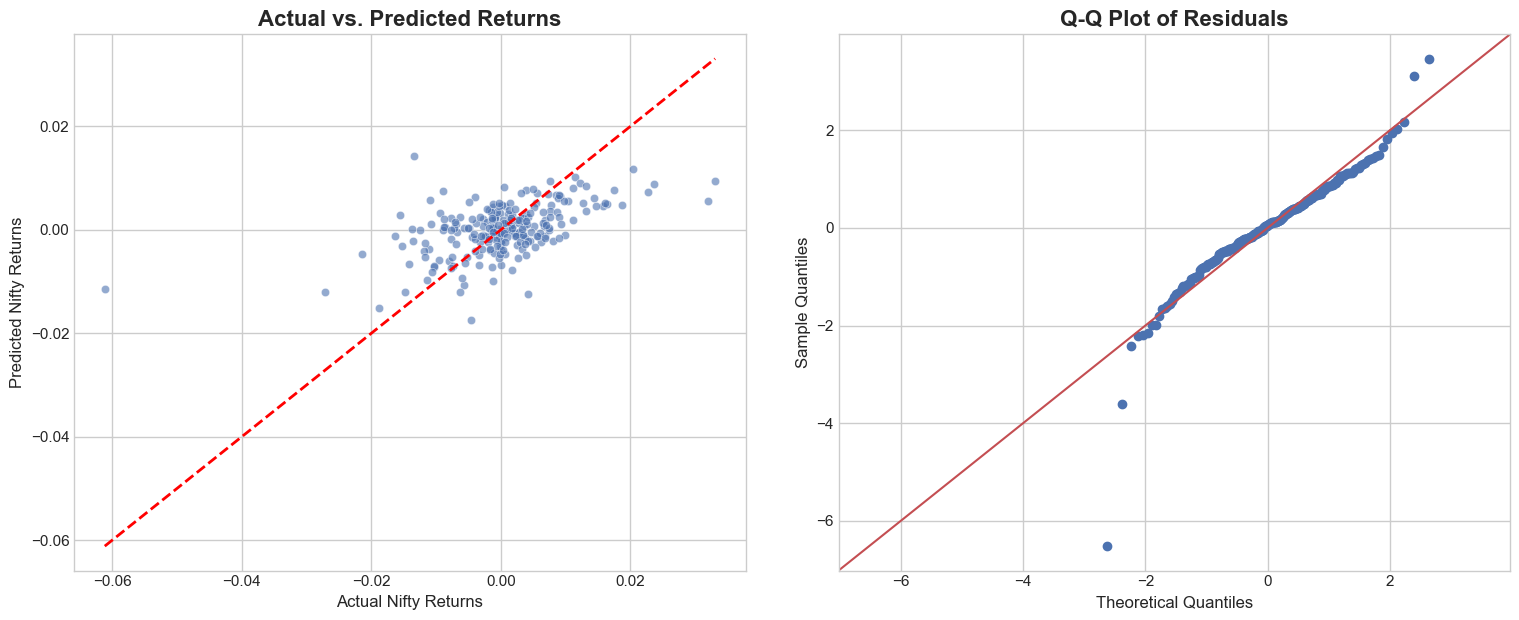

In [26]:
# Creating the side-by-side plot
plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

#  Fitted vs. Actual Plot
# Scatter plot of actuals vs. predicted values
sns.scatterplot(x=y, y=model.fittedvalues, ax=ax1, alpha=0.6)
p_min = min(y.min(), model.fittedvalues.min())
p_max = max(y.max(), model.fittedvalues.max())
# Add the 45-degree reference line (perfect predictions)
line_coords = [p_min, p_max]
ax1.plot(line_coords, line_coords, color='red', linestyle='--', linewidth=2)

ax1.set_title('Actual vs. Predicted Returns', fontsize=16, weight='bold')
ax1.set_xlabel('Actual Nifty Returns', fontsize=12)
ax1.set_ylabel('Predicted Nifty Returns', fontsize=12)

# Q-Q Plot of Residuals
# `sm.qqplot` generates the plot, and we direct it to our axis `ax2`
sm.qqplot(model.resid, line='45', fit=True, ax=ax2)
ax2.set_title('Q-Q Plot of Residuals', fontsize=16, weight='bold')
plt.tight_layout(pad=3.0)
plt.show()

In [27]:
df.to_pickle('final_analysis_data.pkl')
print("\nFinal DataFrame saved successfully as 'final_analysis_data.pkl'")


Final DataFrame saved successfully as 'final_analysis_data.pkl'
